<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" style="height:90px;" width=500/></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h3 style="text-align: center;"><b>Convolution and pooling operations</b></h3>

---

### Convolution (свёртка)

На этом семинаре мы посмотрим, как свёртки влияют на изображение и попрактикуемся в вычислении свёрток и пулингов от различных изображений.

Для начала напомним, что такое свёртка:

<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width=450 height=400>

*https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif*

То есть мы берём фильтр размера FxF, умножаем его на область изображения размером FxF поэлементно, складываем получившиеся поэлемнетные произведения и записываем это число в результирующий тензор.

За исключением архитектур типа MobileNet, третья размерность фильтра всегда свопадает с третьей размерностью входного тензора. Если картинка размера HxWx3, то фильтр будет иметь размер FxFx3, и поэлементное произведение будет производиться по всему объёму.

Напомним два важных параметра операции свертки:

stride -- это размер шага окна свёртка по осям x и y (обычно совпадают, но вполне могут быть и разными).

$padding$ -- это окружение картинки по краям нулями (или чем-то другим) для того, чтобы придать изображению после свёртки нужный размер (пэддинг делается до свёртки).

---

Посмотрим на то, как применение свёртки с определёнными фильтрами влияет на изображение. На этот счёт есть хорошая статья на Хабрахабре:  

https://habr.com/post/142818/ 

Возьмём код из статьи и посмотрим, как будет меняться картинка в зависимости от фильтра:

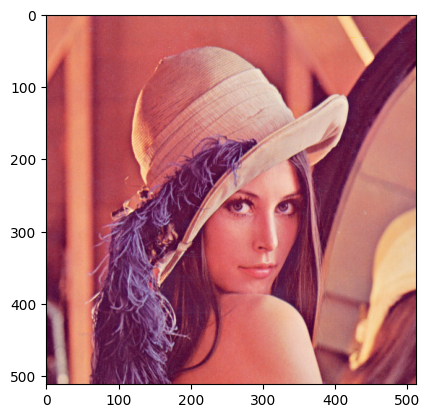

In [13]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt

#https://habrahabr.ru/post/142818/
def checkByte(a):
    if a > 255:
        a = 255
    if a < 0:
        a = 0
    return a
  

def conv(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum
  

def median(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[ceil(len(c)/2)]
  

def max(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[len(c)-1]
  

def min(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[0]

im = Image.open('./lenna.jpg')
pixels = im.load()

plt.imshow(im)
plt.show()

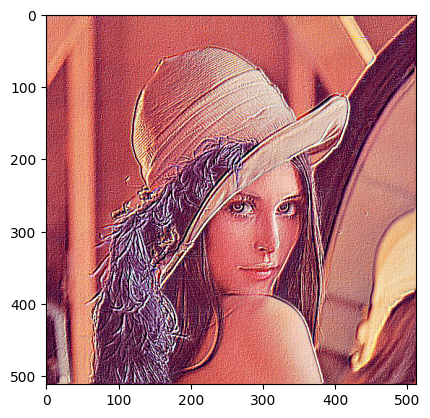

In [15]:
imFinal = im.copy()
pixels2 = imFinal.load()
filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]
'''
filter = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]
'''
'''
filter = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]
'''

'''
filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]
'''

'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]'''


div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), im.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), im.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = checkByte(round(conv(matrR, filter) / div))
        g = checkByte(round(conv(matrG, filter) / div))
        b = checkByte(round(conv(matrB, filter) / div))

       # r = checkByte(min(matrR))
       # g = checkByte(min(matrG))
       # b = checkByte(min(matrB))
        '''
        if r < 512:
            pixels2[i, j] = (255, 255, 255)
        else:
            pixels2[i, j] = (0, 0, 0)'''
        pixels2[i, j] = (r, g, b)

plt.imshow(imFinal)
plt.show()

Попробуйте поменять фильтр и посмотреть, что будет.

---

Давайте немного потренируемся в вычислении размера результата применения свёртки к картинке:

### Задача 1

Вычислить размер результата после применения свёртки, $I$ -- размеры входного изображения, $f$ -- размеры фильтра:

1. Пример: $I$ = (50, 50, 3), $f$ = (3, 3), $stride$ = 1. Вычисляем:
* по ширине: 50 - 3 + 1 = 48,  
* по высоте: 50 - 3 + 1 = 48,   
то есть размер результата будет (48, 48)

2. $I$ = (1024, 768, 3), $f$=(5,5), $stride$ = 2. Вычисляем:


<img src="https://drive.google.com/uc?export=view&id=11bA8ib_n9fRiNyu671VO20YdcMJ_oXX5" width=500/>

Из рисунка видно, что выходная ширина равна количеству нечентых чисел от 1 до 1020, т. е. 510

Аналогично по высоте получаем 382, то есть размер результата будет (510, 382).



3. $I$ = (500, 700, 5), $f$=(7,4), $stride$ = 2

Выведите общую формулу для $I$ = (H, W, C), $f$=(F, F) (фильтры обычно всё же квадратные)

Теперь добавьте в получившуюся формулу $padding = p$:

***место, чтобы вписать получивщуюся формулу***

### N = ((W-F + 2 * P ) / S) + 1
    * n - выходной размер (ширина / высота)
    * W - входной размер изображения (ширина / высота)
    * F - входной размер фильтра (ширина / высота)
    * P - заполняемость "паддинг" (по дефолту = 0)
    * S - размер страйда

**Вопросы для самоконтроля:**
Что такое свёртка?
Фильтр?
Stride?
Padding?

### Pooling

Pooling (пулинг) -- операция, нужная для уменьшения размерности по ширине и по высоте. Можно брать очень много операций в качестве пулинга, например, минимум из элементов, максимум, среднее, сумму и т.д.

Обычно используется max- и avg-pooling.

Пример применения max-pooling'а:

<img src="https://i.stack.imgur.com/W9a9n.jpg">

*https://i.stack.imgur.com/W9a9n.jpg*

Примеры применения max и avg pooling'ов:


<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png">

*https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png*

Если на вход подаётся изображение с несколькими каналами, то пулинг берётся по каналам, то есть если это цветная картинка HxWxC, и мы применяем к ней pooling 2x2, то получим на выходе (H // 2) x (W // 2) x C

Эта операция весьма простая, но лучше разобрать несколько примеров (см. на доску).

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета:  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам свёрточных нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/convolutional-networks/  
http://cs231n.github.io/understanding-cnn/  
http://cs231n.github.io/transfer-learning/

4). Видео о Computer Vision от Andrej Karpathy: https://www.youtube.com/watch?v=u6aEYuemt0M